# Ph√¢n lo·∫°i ·∫£nh s·∫£n ph·∫©m th·ªùi trang s·ª≠ d·ª•ng MobileViT v3

## 1. Gi·ªõi thi·ªáu
* **M·ª•c ti√™u:** X√¢y d·ª±ng v√† so s√°nh c√°c m√¥ h√¨nh ph√¢n lo·∫°i ·∫£nh s·∫£n ph·∫©m th·ªùi trang t·ª´ c√°c th∆∞∆°ng hi·ªáu kh√°c nhau (Adidas, Uniqlo, Yame) s·ª≠ d·ª•ng hai phi√™n b·∫£n MobileViT v3 (0.5 v√† 1.0).
* **V·∫•n ƒë·ªÅ c·∫ßn gi·∫£i quy·∫øt:** T·ª± ƒë·ªông nh·∫≠n di·ªán v√† ph√¢n lo·∫°i c√°c lo·∫°i s·∫£n ph·∫©m th·ªùi trang (√°o v√† qu·∫ßn) t·ª´ c√°c th∆∞∆°ng hi·ªáu kh√°c nhau d·ª±a tr√™n h√¨nh ·∫£nh, s·ª≠ d·ª•ng m√¥ h√¨nh hi·ªáu qu·∫£ v√† nh·∫π.
* **Dataset:** D·ªØ li·ªáu MANAGE.csv ch·ª©a th√¥ng tin v·ªÅ ƒë∆∞·ªùng d·∫´n h√¨nh ·∫£nh v√† nh√£n ph√¢n lo·∫°i t∆∞∆°ng ·ª©ng (ao_adidas, quan_adidas, ao_uniqlo, quan_uniqlo, ao_yame, quan_yame).
* **K·ªπ thu·∫≠t AI √°p d·ª•ng:** S·ª≠ d·ª•ng MobileViT v3, m·ªôt ki·∫øn tr√∫c nh·∫π k·∫øt h·ª£p gi·ªØa Mobile Neural Networks v√† Vision Transformers, ph√π h·ª£p cho c√°c ·ª©ng d·ª•ng tr√™n thi·∫øt b·ªã di ƒë·ªông.

## 2. Chu·∫©n b·ªã M√¥i tr∆∞·ªùng v√† Th∆∞ vi·ªán
* C√†i ƒë·∫∑t c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt cho qu√° tr√¨nh hu·∫•n luy·ªán v√† ƒë√°nh gi√° m√¥ h√¨nh
* Import c√°c th∆∞ vi·ªán v√† ki·ªÉm tra phi√™n b·∫£n

In [1]:
# C√†i ƒë·∫∑t c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt (b·ªè comment n·∫øu c·∫ßn c√†i ƒë·∫∑t)
!pip install --quiet --upgrade pip
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# !pip install transformers datasets evaluate accelerate

# Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
# System Libraries
import os
import random
import numpy as np
import pandas as pd
from pathlib import Path

# PyTorch v√† Transformers
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
try:
    import evaluate
except ImportError:
    !pip install --quiet evaluate
    import evaluate
from PIL import Image as PILImage
try:
    from transformers import (
        AutoImageProcessor, 
        AutoModelForImageClassification,
        MobileViTImageProcessor,
        MobileViTForImageClassification,
        TrainingArguments, 
        Trainer
    )
except ImportError:
    !pip install --quiet transformers
    from transformers import (
        AutoImageProcessor,
        AutoModelForImageClassification,
        MobileViTImageProcessor,
        MobileViTForImageClassification,
        TrainingArguments, 
        Trainer
    )
try:
    from datasets import load_dataset, Dataset as HFDataset, DatasetDict, Image, Features, ClassLabel
except ImportError:
    !pip install --quiet datasets
    from datasets import load_dataset, Dataset as HFDataset, DatasetDict, Image, Features, ClassLabel

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Ki·ªÉm tra phi√™n b·∫£n c√°c th∆∞ vi·ªán ch√≠nh
print("Python libraries versions:")
print(f"PyTorch: {torch.__version__}")
try:
    import transformers
    print(f"Transformers: {transformers.__version__}")
except:
    print("Transformers: Not imported")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")

# Ki·ªÉm tra GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if device.type == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / (1024**3):.2f} GB")


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Users\ASUS\Desktop\HK7\DEEP LEARNING\deep\Scripts\python.exe -m pip install --quiet --upgrade pip
c:\Users\ASUS\Desktop\HK7\DEEP LEARNING\deep\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Python libraries versions:
PyTorch: 2.4.1+cu118
Transformers: 4.45.2
NumPy: 1.26.4
Pandas: 2.2.2
Using device: cpu


## 3. Kh√°m ph√° v√† Ti·ªÅn x·ª≠ l√Ω D·ªØ li·ªáu
* T·∫£i v√† kh√°m ph√° d·ªØ li·ªáu t·ª´ file MANAGE.csv
* Ph√¢n t√≠ch ph√¢n b·ªë c√°c nh√£n trong dataset
* Xem tr∆∞·ªõc m·ªôt s·ªë h√¨nh ·∫£nh m·∫´u t·ª´ c√°c l·ªõp
* Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu v√† chu·∫©n b·ªã cho qu√° tr√¨nh hu·∫•n luy·ªán

In [2]:
# ƒê·ªçc d·ªØ li·ªáu t·ª´ file CSV
df = pd.read_csv("./MANAGE.csv")
df


dir      label  \
0     1f6ac96bdbcf41888b7daf2d00173c5c_9366.jpg  ao_adidas   
1     9183cfc4ec0141d0b0bbdef51bd6ec68_9366.jpg  ao_adidas   
2     c4778cff7cc24601ba15af4600f3ca4a_9366.jpg  ao_adidas   
3     a593596b4ea94574beec630314f4a5e0_9366.jpg  ao_adidas   
4     00c9cbf1eb044c6a9934afaa00de8e5b_9366.jpg  ao_adidas   
...                                         ...        ...   
7147   f8b32ca0-5fa3-a700-3067-001931340ae4.jpg  quan_yame   
7148   77d0962a-d3ec-af00-bbd5-00194cb1f951.jpg  quan_yame   
7149   421e0533-017a-3801-d6a5-001999bf4794.jpg  quan_yame   
7150   315764eb-5068-3b00-ad44-001af08675fb.jpg  quan_yame   
7151   82f2e01a-389f-6400-79a5-001a1deb3fee.jpg  quan_yame   

                                                  title             color  \
0                 √Åo Thun Graphic Badge of Sport In Hoa             Black   
1                                  √Åo Kho√°c Own the Run             White   
2                          √Åo Thun Oversize Yoga Studio      Preloved Red   
3              √Åo Tank Top Jersey Cotton One Basketball  Cream White Mel.   
4        √Åo Thun Kh√≥a K√©o L·ª≠ng D√†i Tay Collective Power       Clay Strata   
...                                                 ...               ...   
7147  Qu·∫ßn D√†i L∆∞ng Thun ·ªêng ƒê·ª©ng V·∫£i Denim Co Gi√£n ...          Xanh R√™u   
7148  Qu·∫ßn D√†i L∆∞ng G√†i ·ªêng ƒê·ª©ng V·∫£i Denim Co Gi√£n T...           N√¢u ƒê·∫≠m   
7149  Qu·∫ßn Jean L∆∞ng G√†i ·ªêng ƒê·ª©ng V·∫£i Cotton Co Gi√£n...          Xanh ƒê·∫≠m   
7150  Qu·∫ßn Jean L∆∞ng G√†i ·ªêng ƒê·ª©ng V·∫£i Cotton Co Gi√£n...        Xanh D∆∞∆°ng   
7151  Qu·∫ßn D√†i L∆∞ng G√†i ·ªêng ƒê·ª©ng V·∫£i Denim Co Gi√£n √ç...          Xanh R√™u   

                                             decripsion  \
0     Chi·∫øc √°o thun phong c√°ch bi·ªÉu t∆∞·ª£ng v·ªõi ƒëi·ªÉm n...   
1     Chi·∫øc √°o kho√°c ch·∫°y b·ªô c·∫£n gi√≥ c√≥ s·ª≠ d·ª•ng ch·∫•t...   
2     Chi·∫øc √°o thun yoga c√≥ ngu·ªìn g·ªëc t·ª± nhi√™n.M·∫°nh ...   
3     Chi·∫øc √°o thun cotton t√¥n vinh b·ªô m√¥n b√≥ng r·ªï.S...   
4     Chi·∫øc √°o ch·∫°y b·ªô √¥m s√°t v·ªõi c√°c chi ti·∫øt x·∫øp n...   
...                                                 ...   
7147  \nM√¥ t·∫£ s·∫£n ph·∫©m\nQu·∫ßn D√†i Trouser ƒê∆°n Gi·∫£n Y ...   
7148  \nM√¥ t·∫£ s·∫£n ph·∫©m\nQu·∫ßn D√†i V·∫£i T·ªëi Gi·∫£n M9Ch·∫•t...   
7149  \nM√¥ t·∫£ s·∫£n ph·∫©m\nQu·∫ßn Jean Slimfit 12VAHDT V·∫°...   
7150  \nM√¥ t·∫£ s·∫£n ph·∫©m\nCh·∫•t li·ªáu: Jean Cotton Spand...   
7151  \nM√¥ t·∫£ s·∫£n ph·∫©m\nQu·∫ßn D√†i V·∫£i ƒê∆°n Gi·∫£n Y Nguy...   

                                              image_dir  
0     ao_adidas/1f6ac96bdbcf41888b7daf2d00173c5c_936...  
1     ao_adidas/9183cfc4ec0141d0b0bbdef51bd6ec68_936...  
2     ao_adidas/c4778cff7cc24601ba15af4600f3ca4a_936...  
3     ao_adidas/a593596b4ea94574beec630314f4a5e0_936...  
4     ao_adidas/00c9cbf1eb044c6a9934afaa00de8e5b_936...  
...                                                 ...  
7147  quan_yame/f8b32ca0-5fa3-a700-3067-001931340ae4...  
7148  quan_yame/77d0962a-d3ec-af00-bbd5-00194cb1f951...  
7149  quan_yame/421e0533-017a-3801-d6a5-001999bf4794...  
7150  quan_yame/315764eb-5068-3b00-ad44-001af08675fb...  
7151  quan_yame/82f2e01a-389f-6400-79a5-001a1deb3fee...  

[7152 rows x 6 columns]

In [3]:
# Ki·ªÉm tra v√† lo·∫°i b·ªè c√°c ·∫£nh kh√¥ng h·ª£p l·ªá ho·∫∑c kh√¥ng t·ªìn t·∫°i
print("Ki·ªÉm tra v√† lo·∫°i b·ªè c√°c ·∫£nh kh√¥ng h·ª£p l·ªá...")

invalid_indices = []
for index, row in df.iterrows():
    img_path = row['image_dir']
    try:
        # Th·ª≠ m·ªü ·∫£nh ƒë·ªÉ ki·ªÉm tra t√≠nh h·ª£p l·ªá
        img = PILImage.open(img_path)
        img.verify() # Ki·ªÉm tra t√≠nh to√†n v·∫πn c·ªßa file ·∫£nh
        img.close() # ƒê√≥ng file sau khi ki·ªÉm tra
    except Exception as e:
        print(f"·∫¢nh kh√¥ng h·ª£p l·ªá ho·∫∑c kh√¥ng t√¨m th·∫•y: {img_path} - L·ªói: {e}")
        invalid_indices.append(index)

# Lo·∫°i b·ªè c√°c d√≤ng c√≥ ·∫£nh kh√¥ng h·ª£p l·ªá kh·ªèi DataFrame
if invalid_indices:
    print(f"\nT√¨m th·∫•y {len(invalid_indices)} ·∫£nh kh√¥ng h·ª£p l·ªá. ƒêang lo·∫°i b·ªè kh·ªèi DataFrame.")
    df_cleaned = df.drop(invalid_indices).reset_index(drop=True)
    print(f"K√≠ch th∆∞·ªõc DataFrame sau khi lo·∫°i b·ªè: {df_cleaned.shape}")
    
    # C·∫≠p nh·∫≠t DataFrame g·ªëc
    df = df_cleaned
    
    # L∆∞u DataFrame ƒë√£ l√†m s·∫°ch tr·ªü l·∫°i file CSV
    try:
        df.to_csv("./MANAGE.csv", index=False)
        print("ƒê√£ l∆∞u DataFrame ƒë√£ l√†m s·∫°ch v√†o ./MANAGE.csv")
    except Exception as e:
        print(f"L·ªói khi l∆∞u file CSV: {e}")
else:
    print("\nKh√¥ng t√¨m th·∫•y ·∫£nh kh√¥ng h·ª£p l·ªá n√†o.")


Ki·ªÉm tra v√† lo·∫°i b·ªè c√°c ·∫£nh kh√¥ng h·ª£p l·ªá...

Kh√¥ng t√¨m th·∫•y ·∫£nh kh√¥ng h·ª£p l·ªá n√†o.



DataFrame sau khi l√†m s·∫°ch:
DataFrame shape: (7152, 6)


dir      label  \
0  1f6ac96bdbcf41888b7daf2d00173c5c_9366.jpg  ao_adidas   
1  9183cfc4ec0141d0b0bbdef51bd6ec68_9366.jpg  ao_adidas   
2  c4778cff7cc24601ba15af4600f3ca4a_9366.jpg  ao_adidas   
3  a593596b4ea94574beec630314f4a5e0_9366.jpg  ao_adidas   
4  00c9cbf1eb044c6a9934afaa00de8e5b_9366.jpg  ao_adidas   

                                            title             color  \
0           √Åo Thun Graphic Badge of Sport In Hoa             Black   
1                            √Åo Kho√°c Own the Run             White   
2                    √Åo Thun Oversize Yoga Studio      Preloved Red   
3        √Åo Tank Top Jersey Cotton One Basketball  Cream White Mel.   
4  √Åo Thun Kh√≥a K√©o L·ª≠ng D√†i Tay Collective Power       Clay Strata   

                                          decripsion  \
0  Chi·∫øc √°o thun phong c√°ch bi·ªÉu t∆∞·ª£ng v·ªõi ƒëi·ªÉm n...   
1  Chi·∫øc √°o kho√°c ch·∫°y b·ªô c·∫£n gi√≥ c√≥ s·ª≠ d·ª•ng ch·∫•t...   
2  Chi·∫øc √°o thun yoga c√≥ ngu·ªìn g·ªëc t·ª± nhi√™n.M·∫°nh ...   
3  Chi·∫øc √°o thun cotton t√¥n vinh b·ªô m√¥n b√≥ng r·ªï.S...   
4  Chi·∫øc √°o ch·∫°y b·ªô √¥m s√°t v·ªõi c√°c chi ti·∫øt x·∫øp n...   

                                           image_dir  
0  ao_adidas/1f6ac96bdbcf41888b7daf2d00173c5c_936...  
1  ao_adidas/9183cfc4ec0141d0b0bbdef51bd6ec68_936...  
2  ao_adidas/c4778cff7cc24601ba15af4600f3ca4a_936...  
3  ao_adidas/a593596b4ea94574beec630314f4a5e0_936...  
4  ao_adidas/00c9cbf1eb044c6a9934afaa00de8e5b_936...

DataFrame shape: (7152, 6)


dir      label  \
0  1f6ac96bdbcf41888b7daf2d00173c5c_9366.jpg  ao_adidas   
1  9183cfc4ec0141d0b0bbdef51bd6ec68_9366.jpg  ao_adidas   
2  c4778cff7cc24601ba15af4600f3ca4a_9366.jpg  ao_adidas   
3  a593596b4ea94574beec630314f4a5e0_9366.jpg  ao_adidas   
4  00c9cbf1eb044c6a9934afaa00de8e5b_9366.jpg  ao_adidas   

                                            title             color  \
0           √Åo Thun Graphic Badge of Sport In Hoa             Black   
1                            √Åo Kho√°c Own the Run             White   
2                    √Åo Thun Oversize Yoga Studio      Preloved Red   
3        √Åo Tank Top Jersey Cotton One Basketball  Cream White Mel.   
4  √Åo Thun Kh√≥a K√©o L·ª≠ng D√†i Tay Collective Power       Clay Strata   

                                          decripsion  \
0  Chi·∫øc √°o thun phong c√°ch bi·ªÉu t∆∞·ª£ng v·ªõi ƒëi·ªÉm n...   
1  Chi·∫øc √°o kho√°c ch·∫°y b·ªô c·∫£n gi√≥ c√≥ s·ª≠ d·ª•ng ch·∫•t...   
2  Chi·∫øc √°o thun yoga c√≥ ngu·ªìn g·ªëc t·ª± nhi√™n.M·∫°nh ...   
3  Chi·∫øc √°o thun cotton t√¥n vinh b·ªô m√¥n b√≥ng r·ªï.S...   
4  Chi·∫øc √°o ch·∫°y b·ªô √¥m s√°t v·ªõi c√°c chi ti·∫øt x·∫øp n...   

                                           image_dir  
0  ao_adidas/1f6ac96bdbcf41888b7daf2d00173c5c_936...  
1  ao_adidas/9183cfc4ec0141d0b0bbdef51bd6ec68_936...  
2  ao_adidas/c4778cff7cc24601ba15af4600f3ca4a_936...  
3  ao_adidas/a593596b4ea94574beec630314f4a5e0_936...  
4  ao_adidas/00c9cbf1eb044c6a9934afaa00de8e5b_936...


DataFrame columns: ['dir', 'label', 'title', 'color', 'decripsion', 'image_dir']

Unique labels: ['ao_adidas' 'quan_adidas' 'ao_uniqlo' 'quan_uniqlo' 'ao_yame' 'quan_yame']

Label distribution:


label
ao_adidas      2098
quan_adidas    1716
ao_yame        1060
ao_uniqlo       924
quan_uniqlo     792
quan_yame       562
Name: count, dtype: int64

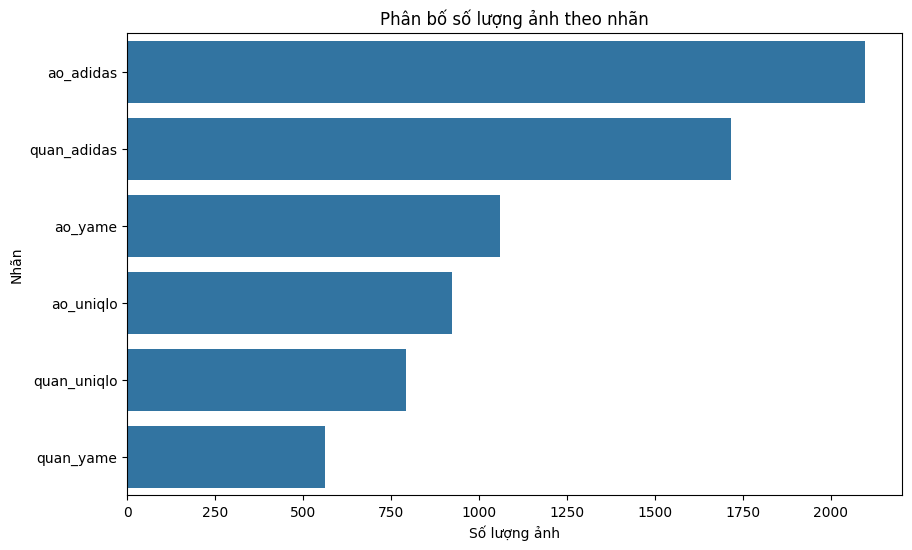

In [4]:

# Hi·ªÉn th·ªã l·∫°i th√¥ng tin DataFrame sau khi l√†m s·∫°ch
print("\nDataFrame sau khi l√†m s·∫°ch:")
print("DataFrame shape:", df.shape)
display(df.head())
# Hi·ªÉn th·ªã m·ªôt v√†i d√≤ng ƒë·ªÉ ki·ªÉm tra d·ªØ li·ªáu
print("DataFrame shape:", df.shape)
display(df.head())

# Ki·ªÉm tra c√°c c·ªôt trong DataFrame
print("\nDataFrame columns:", df.columns.tolist())

# Ki·ªÉm tra c√°c gi√° tr·ªã ƒë·ªôc ƒë√°o trong c·ªôt label
print("\nUnique labels:", df['label'].unique())

# Ph√¢n t√≠ch ph√¢n b·ªë nh√£n
label_counts = df['label'].value_counts()
print("\nLabel distribution:")
display(label_counts)

# V·∫Ω bi·ªÉu ƒë·ªì ph√¢n b·ªë nh√£n
plt.figure(figsize=(10, 6))
sns.countplot(y=df['label'], order=label_counts.index)
plt.title('Ph√¢n b·ªë s·ªë l∆∞·ª£ng ·∫£nh theo nh√£n')
plt.xlabel('S·ªë l∆∞·ª£ng ·∫£nh')
plt.ylabel('Nh√£n')
plt.show()

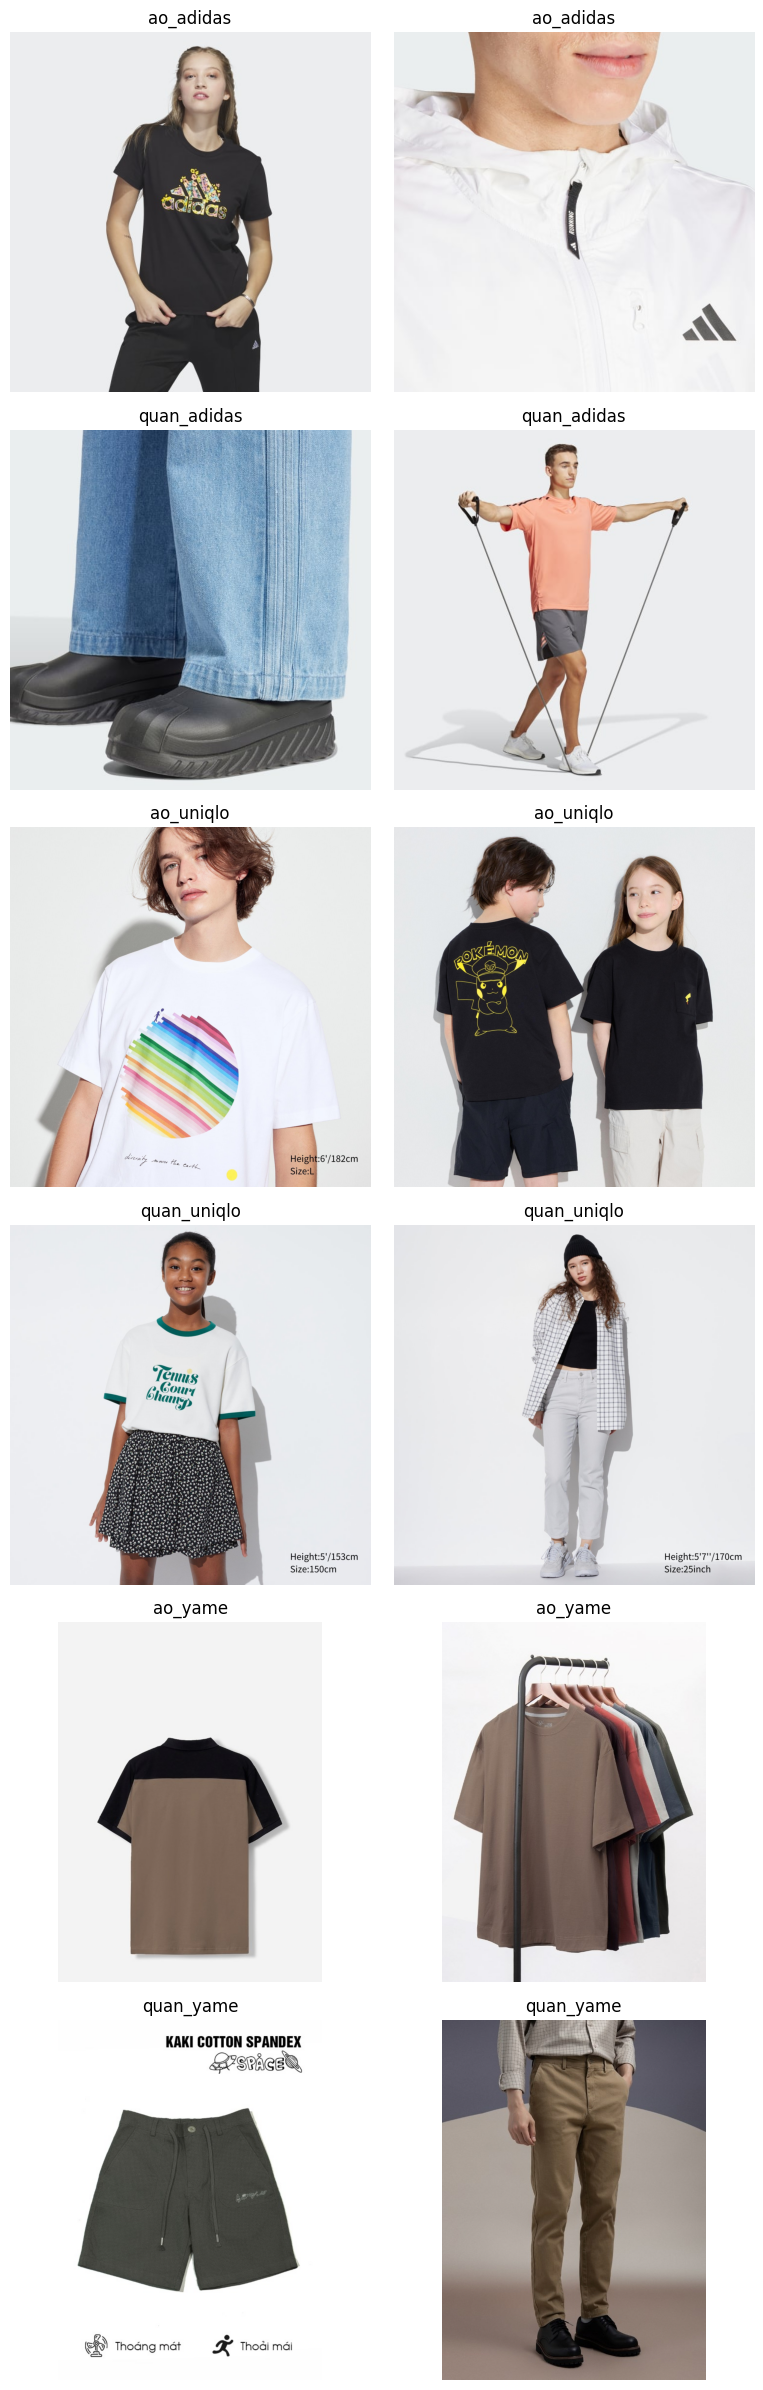

In [5]:
# H√†m ƒë·ªÉ hi·ªÉn th·ªã m·ªôt s·ªë ·∫£nh m·∫´u t·ª´ m·ªói l·ªõp
def display_sample_images(dataframe, label_column='label', image_path_column='image_dir', n_samples=2):
    unique_labels = dataframe[label_column].unique()
    
    # T·∫°o l∆∞·ªõi ƒë·ªÉ hi·ªÉn th·ªã ·∫£nh
    n_labels = len(unique_labels)
    fig, axes = plt.subplots(n_labels, n_samples, figsize=(n_samples * 4, n_labels * 4))
    
    for i, label in enumerate(unique_labels):
        # L·ªçc d·ªØ li·ªáu theo nh√£n
        label_df = dataframe[dataframe[label_column] == label]
        
        # L·∫•y ng·∫´u nhi√™n n_samples ·∫£nh
        sample_indices = np.random.choice(label_df.index, min(n_samples, len(label_df)), replace=False)
        
        for j, idx in enumerate(sample_indices):
            # ƒê·ªçc ·∫£nh
            img_path = label_df.iloc[j][image_path_column]
            try:
                img = PILImage.open(img_path)
                
                # Hi·ªÉn th·ªã ·∫£nh
                if n_labels > 1:
                    ax = axes[i, j]
                else:
                    ax = axes[j]
                ax.imshow(img)
                ax.set_title(f"{label}")
                ax.axis('off')
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    
    plt.tight_layout()
    plt.show()

# Hi·ªÉn th·ªã m·∫´u ·∫£nh t·ª´ m·ªói l·ªõp
try:
    display_sample_images(df)
except Exception as e:
    print(f"Error displaying images: {e}")
    print("Ki·ªÉm tra ƒë∆∞·ªùng d·∫´n ·∫£nh c√≥ th·ªÉ kh√¥ng ch√≠nh x√°c, c·∫ßn ƒëi·ªÅu ch·ªânh ƒë∆∞·ªùng d·∫´n g·ªëc.")

In [6]:
# ƒêi·ªÅu ch·ªânh ƒë∆∞·ªùng d·∫´n ·∫£nh n·∫øu c·∫ßn
# Trong m·ªôt s·ªë tr∆∞·ªùng h·ª£p, ƒë∆∞·ªùng d·∫´n c√≥ th·ªÉ c·∫ßn ph·∫£i ƒë∆∞·ª£c th√™m v√†o ti·ªÅn t·ªë c·ªßa th∆∞ m·ª•c g·ªëc

# Ki·ªÉm tra xem m·ªôt v√†i ƒë∆∞·ªùng d·∫´n ·∫£nh ƒë·∫ßu ti√™n c√≥ t·ªìn t·∫°i kh√¥ng
print("Ki·ªÉm tra c√°c ƒë∆∞·ªùng d·∫´n ·∫£nh:")
for i, img_path in enumerate(df['image_dir'].head(3)):
    path_exists = os.path.exists(img_path)
    print(f"Image {i+1}: {img_path} - {'Exists' if path_exists else 'Not found'}")

# N·∫øu ƒë∆∞·ªùng d·∫´n kh√¥ng ch√≠nh x√°c, ch√∫ng ta c√≥ th·ªÉ c·∫ßn ƒëi·ªÅu ch·ªânh
base_dir = "./archive"  # Thay ƒë·ªïi n·∫øu c·∫ßn
if not all(os.path.exists(path) for path in df['image_dir'].head(3)):
    print("\nƒêi·ªÅu ch·ªânh ƒë∆∞·ªùng d·∫´n v·ªõi th∆∞ m·ª•c g·ªëc...")
    df['image_dir_fixed'] = df['image_dir'].apply(lambda x: os.path.join(base_dir, x) if not os.path.exists(x) else x)
    
    # Ki·ªÉm tra l·∫°i c√°c ƒë∆∞·ªùng d·∫´n ƒë√£ ƒëi·ªÅu ch·ªânh
    print("\nKi·ªÉm tra l·∫°i c√°c ƒë∆∞·ªùng d·∫´n sau khi ƒëi·ªÅu ch·ªânh:")
    for i, img_path in enumerate(df['image_dir_fixed'].head(3)):
        path_exists = os.path.exists(img_path)
        print(f"Image {i+1}: {img_path} - {'Exists' if path_exists else 'Not found'}")
else:
    df['image_dir_fixed'] = df['image_dir']

Ki·ªÉm tra c√°c ƒë∆∞·ªùng d·∫´n ·∫£nh:
Image 1: ao_adidas/1f6ac96bdbcf41888b7daf2d00173c5c_9366.jpg - Exists
Image 2: ao_adidas/9183cfc4ec0141d0b0bbdef51bd6ec68_9366.jpg - Exists
Image 3: ao_adidas/c4778cff7cc24601ba15af4600f3ca4a_9366.jpg - Exists


In [7]:
# Chu·∫©n b·ªã d·ªØ li·ªáu cho m√¥ h√¨nh MobileViT
# Chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán, x√°c th·ª±c v√† ki·ªÉm tra
from sklearn.model_selection import train_test_split

# Chia d·ªØ li·ªáu th√†nh train (70%), val (15%), test (15%)
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['label'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

print(f"Train set: {len(train_df)} images")
print(f"Validation set: {len(val_df)} images")
print(f"Test set: {len(test_df)} images")

# Chuy·ªÉn ƒë·ªïi DataFrame th√†nh ƒë·ªãnh d·∫°ng Hugging Face Datasets
def create_hf_dataset(dataframe, img_col='image_dir_fixed', label_col='label'):
    # T·∫°o √°nh x·∫° t·ª´ nh√£n vƒÉn b·∫£n sang s·ªë nguy√™n
    label_to_id = {label: idx for idx, label in enumerate(sorted(dataframe[label_col].unique()))}
    id_to_label = {v: k for k, v in label_to_id.items()}
    
    # H√†m ƒë·ªçc v√† x·ª≠ l√Ω ·∫£nh
    def process_example(example):
        try:
            # ƒê·ªçc ·∫£nh t·ª´ ƒë∆∞·ªùng d·∫´n
            image = PILImage.open(example[img_col])
            if image.mode != 'RGB':
                image = image.convert('RGB')
            
            # Chuy·ªÉn ƒë·ªïi nh√£n vƒÉn b·∫£n sang s·ªë nguy√™n
            label_id = label_to_id[example[label_col]]
            
            return {
                'image': image,
                'label': label_id,
                'label_text': example[label_col]
            }
        except Exception as e:
            print(f"Error processing image {example[img_col]}: {e}")
            return None
    
    # X·ª≠ l√Ω t·ª´ng m·∫´u d·ªØ li·ªáu
    dataset_dict = {'image': [], 'label': [], 'label_text': []}
    for _, row in dataframe.iterrows():
        example = process_example(row)
        if example:
            dataset_dict['image'].append(example['image'])
            dataset_dict['label'].append(example['label'])
            dataset_dict['label_text'].append(example['label_text'])
    
    # T·∫°o dataset t·ª´ dictionary
    dataset = HFDataset.from_dict(dataset_dict)
    
    return dataset, label_to_id, id_to_label

# T·∫°o Hugging Face datasets cho train, val v√† test
train_dataset, label_to_id, id_to_label = create_hf_dataset(train_df)
val_dataset, _, _ = create_hf_dataset(val_df)
test_dataset, _, _ = create_hf_dataset(test_df)

# T·ªï ch·ª©c c√°c t·∫≠p d·ªØ li·ªáu v√†o DatasetDict
dataset_dict = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})

print("\nHugging Face Dataset created:")
print(dataset_dict)

# L∆∞u th√¥ng tin √°nh x·∫° nh√£n ƒë·ªÉ s·ª≠ d·ª•ng sau n√†y
print("\nLabel mapping:")
for label, idx in label_to_id.items():
    print(f"{idx}: {label}")

Train set: 5006 images
Validation set: 1073 images
Test set: 1073 images



Hugging Face Dataset created:
DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'label_text'],
        num_rows: 5006
    })
    validation: Dataset({
        features: ['image', 'label', 'label_text'],
        num_rows: 1073
    })
    test: Dataset({
        features: ['image', 'label', 'label_text'],
        num_rows: 1073
    })
})

Label mapping:
0: ao_adidas
1: ao_uniqlo
2: ao_yame
3: quan_adidas
4: quan_uniqlo
5: quan_yame


## 4. X√¢y d·ª±ng v√† C·∫•u h√¨nh M√¥ h√¨nh MobileViT
* T·∫£i processor v√† hai m√¥ h√¨nh MobileViT (v3-0.5 v√† v3-1.0)
* C·∫•u h√¨nh models v·ªõi s·ªë l·ªõp output ph√π h·ª£p
* Thi·∫øt l·∫≠p c√°c tham s·ªë hu·∫•n luy·ªán

In [8]:
# ƒê·ªãnh nghƒ©a c√°c model checkpoints cho MobileViT-v3
mobilevit_small_checkpoint = "apple/mobilevit-xx-small" # T∆∞∆°ng t·ª± MobileViT v3-0.5 v·ªÅ k√≠ch th∆∞·ªõc
mobilevit_large_checkpoint = "apple/mobilevit-small"    # T∆∞∆°ng t·ª± MobileViT v3-1.0 v·ªÅ k√≠ch th∆∞·ªõc

# T·∫£i c√°c image processors
mobilevit_small_processor = AutoImageProcessor.from_pretrained(mobilevit_small_checkpoint)
mobilevit_large_processor = AutoImageProcessor.from_pretrained(mobilevit_large_checkpoint)

# H√†m ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu cho m√¥ h√¨nh MobileViT
def preprocess_images(examples, processor):
    images = examples['image']
    # X·ª≠ l√Ω ·∫£nh v·ªõi image processor
    inputs = processor(images=images, return_tensors="pt", padding=True)
    # Th√™m nh√£n
    inputs['labels'] = examples['label']
    return inputs

# √Åp d·ª•ng ti·ªÅn x·ª≠ l√Ω cho m√¥ h√¨nh small (0.5)
processed_datasets_small = dataset_dict.map(
    lambda examples: preprocess_images(examples, mobilevit_small_processor),
    batched=True,
    remove_columns=['image', 'label_text'],
)

# √Åp d·ª•ng ti·ªÅn x·ª≠ l√Ω cho m√¥ h√¨nh large (1.0)
processed_datasets_large = dataset_dict.map(
    lambda examples: preprocess_images(examples, mobilevit_large_processor),
    batched=True,
    remove_columns=['image', 'label_text'],
)

print("Processed datasets format for MobileViT v3-0.5:")
print(processed_datasets_small)
print("\nProcessed datasets format for MobileViT v3-1.0:")
print(processed_datasets_large)

Map:   0%|          | 0/5006 [00:00<?, ? examples/s]c:\Users\ASUS\Desktop\HK7\DEEP LEARNING\deep\Lib\site-packages\transformers\image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `MobileViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)
Map: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1073/1073 [00:20<00:00, 52.71 examples/s]

Processed datasets format for MobileViT v3-0.5:
DatasetDict({
    train: Dataset({
        features: ['label', 'pixel_values', 'labels'],
        num_rows: 5006
    })
    validation: Dataset({
        features: ['label', 'pixel_values', 'labels'],
        num_rows: 1073
    })
    test: Dataset({
        features: ['label', 'pixel_values', 'labels'],
        num_rows: 1073
    })
})

Processed datasets format for MobileViT v3-1.0:
DatasetDict({
    train: Dataset({
        features: ['label', 'pixel_values', 'labels'],
        num_rows: 5006
    })
    validation: Dataset({
        features: ['label', 'pixel_values', 'labels'],
        num_rows: 1073
    })
    test: Dataset({
        features: ['label', 'pixel_values', 'labels'],
        num_rows: 1073
    })
})


In [9]:
# T·∫£i v√† thi·∫øt l·∫≠p c√°c m√¥ h√¨nh MobileViT
num_labels = len(label_to_id)
id2label = id_to_label
label2id = label_to_id

# T·∫£i m√¥ h√¨nh MobileViT v3-0.5 (small)
model_small = AutoModelForImageClassification.from_pretrained(
    mobilevit_small_checkpoint,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True  # B·ªè qua c√°c sai l·ªách v·ªÅ k√≠ch th∆∞·ªõc
)

# T·∫£i m√¥ h√¨nh MobileViT v3-1.0 (large)
model_large = AutoModelForImageClassification.from_pretrained(
    mobilevit_large_checkpoint,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
)

print(f"Model Small (v3-0.5) architecture: {model_small.__class__.__name__}")
print(f"Model Large (v3-1.0) architecture: {model_large.__class__.__name__}")
print(f"Number of output labels: {num_labels}")

# So s√°nh s·ªë l∆∞·ª£ng tham s·ªë c·ªßa hai m√¥ h√¨nh
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

small_params = count_parameters(model_small)
large_params = count_parameters(model_large)

print(f"\nS·ªë l∆∞·ª£ng tham s·ªë c·ªßa MobileViT v3-0.5: {small_params:,}")
print(f"S·ªë l∆∞·ª£ng tham s·ªë c·ªßa MobileViT v3-1.0: {large_params:,}")
print(f"T·ª∑ l·ªá tham s·ªë (Large/Small): {large_params/small_params:.2f}x")

c:\Users\ASUS\Desktop\HK7\DEEP LEARNING\deep\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ASUS\.cache\huggingface\hub\models--apple--mobilevit-xx-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of MobileViTForImageClassification were not initialized from the model checkpoint at ap

Model Small (v3-0.5) architecture: MobileViTForImageClassification
Model Large (v3-1.0) architecture: MobileViTForImageClassification
Number of output labels: 6

S·ªë l∆∞·ª£ng tham s·ªë c·ªßa MobileViT v3-0.5: 952,950
S·ªë l∆∞·ª£ng tham s·ªë c·ªßa MobileViT v3-1.0: 4,941,478
T·ª∑ l·ªá tham s·ªë (Large/Small): 5.19x


## 5. Hu·∫•n luy·ªán M√¥ h√¨nh
* ƒê·ªãnh nghƒ©a c√°c metrics ƒë·ªÉ ƒë√°nh gi√°
* Thi·∫øt l·∫≠p tham s·ªë hu·∫•n luy·ªán
* Hu·∫•n luy·ªán c·∫£ hai m√¥ h√¨nh 
* So s√°nh qu√° tr√¨nh hu·∫•n luy·ªán

In [10]:
# ƒê·ªãnh nghƒ©a h√†m t√≠nh to√°n metrics
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    
    # T√≠nh to√°n accuracy v√† c√°c metrics kh√°c
    accuracy = accuracy_score(labels, predictions)
    
    # T·∫°o classification report
    report_dict = classification_report(
        labels, predictions, target_names=list(id2label.values()), output_dict=True
    )
    
    # L·∫•y c√°c metrics t·ª´ report
    metrics = {
        "accuracy": accuracy,
    }
    
    # Th√™m precision, recall v√† f1 cho t·ª´ng l·ªõp
    for label_name in id2label.values():
        label_metrics = report_dict[label_name]
        metrics[f"precision_{label_name}"] = label_metrics['precision']
        metrics[f"recall_{label_name}"] = label_metrics['recall']
        metrics[f"f1_{label_name}"] = label_metrics['f1-score']
    
    return metrics

In [11]:
# ƒê·ªãnh nghƒ©a tham s·ªë hu·∫•n luy·ªán cho m√¥ h√¨nh MobileViT v3-0.5 (small)
training_args_small = TrainingArguments(
    output_dir="./results/mobilevit_small_fashion_classifier",
    per_device_train_batch_size=16,  # Batch size l·ªõn h∆°n do m√¥ h√¨nh nh·ªè h∆°n
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=10,
    fp16=torch.cuda.is_available(),
    learning_rate=5e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=False,
    report_to="tensorboard",
)

# Kh·ªüi t·∫°o Trainer cho m√¥ h√¨nh small
trainer_small = Trainer(
    model=model_small,
    args=training_args_small,
    train_dataset=processed_datasets_small["train"],
    eval_dataset=processed_datasets_small["validation"],
    tokenizer=mobilevit_small_processor,
    compute_metrics=compute_metrics,
)

# ƒê·ªãnh nghƒ©a tham s·ªë hu·∫•n luy·ªán cho m√¥ h√¨nh MobileViT v3-1.0 (large)
training_args_large = TrainingArguments(
    output_dir="./results/mobilevit_large_fashion_classifier",
    per_device_train_batch_size=8,  # Batch size nh·ªè h∆°n do m√¥ h√¨nh l·ªõn h∆°n
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=10,
    fp16=torch.cuda.is_available(),
    learning_rate=3e-5,  # Learning rate nh·ªè h∆°n cho m√¥ h√¨nh l·ªõn
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=False,
    report_to="tensorboard",
)

# Kh·ªüi t·∫°o Trainer cho m√¥ h√¨nh large
trainer_large = Trainer(
    model=model_large,
    args=training_args_large,
    train_dataset=processed_datasets_large["train"],
    eval_dataset=processed_datasets_large["validation"],
    tokenizer=mobilevit_large_processor,
    compute_metrics=compute_metrics,
)

c:\Users\ASUS\Desktop\HK7\DEEP LEARNING\deep\Lib\site-packages\transformers\training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [12]:
# Hu·∫•n luy·ªán m√¥ h√¨nh MobileViT v3-0.5 (small)
print("Hu·∫•n luy·ªán m√¥ h√¨nh MobileViT v3-0.5 (small)")
train_results_small = trainer_small.train()

# Hi·ªÉn th·ªã k·∫øt qu·∫£ hu·∫•n luy·ªán
print("\nK·∫øt qu·∫£ hu·∫•n luy·ªán MobileViT v3-0.5:")
print(train_results_small)

# ƒê√°nh gi√° m√¥ h√¨nh tr√™n t·∫≠p validation
eval_results_small = trainer_small.evaluate()
print("\nK·∫øt qu·∫£ ƒë√°nh gi√° MobileViT v3-0.5 tr√™n t·∫≠p validation:")
print(  )

# L∆∞u m√¥ h√¨nh
trainer_small.save_model("./models/mobilevit_small_fashion_classifier")
print("ƒê√£ l∆∞u m√¥ h√¨nh MobileViT v3-0.5 t·∫°i ./models/mobilevit_small_fashion_classifier")

Hu·∫•n luy·ªán m√¥ h√¨nh MobileViT v3-0.5 (small)


                                                    
 10%|‚ñà         | 313/3130 [16:27<1:31:48,  1.96s/it]

{'eval_loss': 1.1844836473464966, 'eval_accuracy': 0.6859273066169618, 'eval_precision_ao_adidas': 0.8571428571428571, 'eval_recall_ao_adidas': 0.535031847133758, 'eval_f1_ao_adidas': 0.6588235294117647, 'eval_precision_ao_uniqlo': 0.5721925133689839, 'eval_recall_ao_uniqlo': 0.7697841726618705, 'eval_f1_ao_uniqlo': 0.656441717791411, 'eval_precision_ao_yame': 0.5513513513513514, 'eval_recall_ao_yame': 0.6415094339622641, 'eval_f1_ao_yame': 0.5930232558139535, 'eval_precision_quan_adidas': 0.7164179104477612, 'eval_recall_quan_adidas': 0.7470817120622568, 'eval_f1_quan_adidas': 0.7314285714285714, 'eval_precision_quan_uniqlo': 0.865546218487395, 'eval_recall_quan_uniqlo': 0.865546218487395, 'eval_f1_quan_uniqlo': 0.865546218487395, 'eval_precision_quan_yame': 0.5423728813559322, 'eval_recall_quan_yame': 0.7529411764705882, 'eval_f1_quan_yame': 0.6305418719211823, 'eval_runtime': 133.6917, 'eval_samples_per_second': 8.026, 'eval_steps_per_second': 0.509, 'epoch': 1.0}


 16%|‚ñà‚ñå        | 500/3130 [24:34<1:50:21,  2.52s/it] 

{'loss': 1.382, 'grad_norm': 4.740224361419678, 'learning_rate': 4.201277955271566e-05, 'epoch': 1.6}


                                                    
 20%|‚ñà‚ñà        | 626/3130 [32:12<1:22:51,  1.99s/it]

{'eval_loss': 0.8824223875999451, 'eval_accuracy': 0.7632805219012115, 'eval_precision_ao_adidas': 0.8914027149321267, 'eval_recall_ao_adidas': 0.6273885350318471, 'eval_f1_ao_adidas': 0.7364485981308411, 'eval_precision_ao_uniqlo': 0.7323943661971831, 'eval_recall_ao_uniqlo': 0.7482014388489209, 'eval_f1_ao_uniqlo': 0.7402135231316725, 'eval_precision_ao_yame': 0.6285714285714286, 'eval_recall_ao_yame': 0.8301886792452831, 'eval_f1_ao_yame': 0.7154471544715447, 'eval_precision_quan_adidas': 0.7741935483870968, 'eval_recall_quan_adidas': 0.8404669260700389, 'eval_f1_quan_adidas': 0.8059701492537313, 'eval_precision_quan_uniqlo': 0.781021897810219, 'eval_recall_quan_uniqlo': 0.8991596638655462, 'eval_f1_quan_uniqlo': 0.8359375, 'eval_precision_quan_yame': 0.75, 'eval_recall_quan_yame': 0.7411764705882353, 'eval_f1_quan_yame': 0.7455621301775148, 'eval_runtime': 131.7143, 'eval_samples_per_second': 8.146, 'eval_steps_per_second': 0.516, 'epoch': 2.0}


                                                     
 30%|‚ñà‚ñà‚ñà       | 939/3130 [47:58<1:09:42,  1.91s/it]

{'eval_loss': 0.5901219248771667, 'eval_accuracy': 0.8406337371854613, 'eval_precision_ao_adidas': 0.8932384341637011, 'eval_recall_ao_adidas': 0.7993630573248408, 'eval_f1_ao_adidas': 0.8436974789915966, 'eval_precision_ao_uniqlo': 0.7454545454545455, 'eval_recall_ao_uniqlo': 0.8848920863309353, 'eval_f1_ao_uniqlo': 0.8092105263157895, 'eval_precision_ao_yame': 0.8676470588235294, 'eval_recall_ao_yame': 0.7421383647798742, 'eval_f1_ao_yame': 0.8, 'eval_precision_quan_adidas': 0.8049645390070922, 'eval_recall_quan_adidas': 0.8832684824902723, 'eval_f1_quan_adidas': 0.8423005565862709, 'eval_precision_quan_uniqlo': 0.864, 'eval_recall_quan_uniqlo': 0.907563025210084, 'eval_f1_quan_uniqlo': 0.8852459016393442, 'eval_precision_quan_yame': 0.8928571428571429, 'eval_recall_quan_yame': 0.8823529411764706, 'eval_f1_quan_yame': 0.8875739644970414, 'eval_runtime': 129.0251, 'eval_samples_per_second': 8.316, 'eval_steps_per_second': 0.527, 'epoch': 3.0}


 32%|‚ñà‚ñà‚ñà‚ñè      | 1000/3130 [50:36<1:40:30,  2.83s/it]

{'loss': 0.8331, 'grad_norm': 11.983304977416992, 'learning_rate': 3.402555910543131e-05, 'epoch': 3.19}


                                                       
 40%|‚ñà‚ñà‚ñà‚ñà      | 1252/3130 [1:04:14<1:00:14,  1.92s/it]

{'eval_loss': 0.4856545329093933, 'eval_accuracy': 0.869524697110904, 'eval_precision_ao_adidas': 0.9239543726235742, 'eval_recall_ao_adidas': 0.7738853503184714, 'eval_f1_ao_adidas': 0.8422876949740035, 'eval_precision_ao_uniqlo': 0.8741258741258742, 'eval_recall_ao_uniqlo': 0.8992805755395683, 'eval_f1_ao_uniqlo': 0.8865248226950354, 'eval_precision_ao_yame': 0.8488372093023255, 'eval_recall_ao_yame': 0.9182389937106918, 'eval_f1_ao_yame': 0.8821752265861027, 'eval_precision_quan_adidas': 0.8140350877192982, 'eval_recall_quan_adidas': 0.9027237354085603, 'eval_f1_quan_adidas': 0.8560885608856088, 'eval_precision_quan_uniqlo': 0.8888888888888888, 'eval_recall_quan_uniqlo': 0.9411764705882353, 'eval_f1_quan_uniqlo': 0.9142857142857143, 'eval_precision_quan_yame': 0.8928571428571429, 'eval_recall_quan_yame': 0.8823529411764706, 'eval_f1_quan_yame': 0.8875739644970414, 'eval_runtime': 145.2262, 'eval_samples_per_second': 7.388, 'eval_steps_per_second': 0.468, 'epoch': 4.0}


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1500/3130 [1:16:15<1:15:22,  2.77s/it] 

{'loss': 0.6046, 'grad_norm': 9.852116584777832, 'learning_rate': 2.6038338658146967e-05, 'epoch': 4.79}


                                                       
 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1565/3130 [1:21:28<50:31,  1.94s/it]

{'eval_loss': 0.39997828006744385, 'eval_accuracy': 0.8816402609506058, 'eval_precision_ao_adidas': 0.9151943462897526, 'eval_recall_ao_adidas': 0.8248407643312102, 'eval_f1_ao_adidas': 0.8676716917922948, 'eval_precision_ao_uniqlo': 0.8873239436619719, 'eval_recall_ao_uniqlo': 0.9064748201438849, 'eval_f1_ao_uniqlo': 0.896797153024911, 'eval_precision_ao_yame': 0.9032258064516129, 'eval_recall_ao_yame': 0.8805031446540881, 'eval_f1_ao_yame': 0.89171974522293, 'eval_precision_quan_adidas': 0.818815331010453, 'eval_recall_quan_adidas': 0.914396887159533, 'eval_f1_quan_adidas': 0.8639705882352942, 'eval_precision_quan_uniqlo': 0.9016393442622951, 'eval_recall_quan_uniqlo': 0.9243697478991597, 'eval_f1_quan_uniqlo': 0.9128630705394191, 'eval_precision_quan_yame': 0.9047619047619048, 'eval_recall_quan_yame': 0.8941176470588236, 'eval_f1_quan_yame': 0.8994082840236687, 'eval_runtime': 138.6122, 'eval_samples_per_second': 7.741, 'eval_steps_per_second': 0.491, 'epoch': 5.0}


                                                        
 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 1878/3130 [1:37:59<47:07,  2.26s/it]

{'eval_loss': 0.359530508518219, 'eval_accuracy': 0.8788443616029823, 'eval_precision_ao_adidas': 0.8726114649681529, 'eval_recall_ao_adidas': 0.8726114649681529, 'eval_f1_ao_adidas': 0.8726114649681529, 'eval_precision_ao_uniqlo': 0.8431372549019608, 'eval_recall_ao_uniqlo': 0.9280575539568345, 'eval_f1_ao_uniqlo': 0.8835616438356164, 'eval_precision_ao_yame': 0.8987341772151899, 'eval_recall_ao_yame': 0.8930817610062893, 'eval_f1_ao_yame': 0.8958990536277602, 'eval_precision_quan_adidas': 0.8627450980392157, 'eval_recall_quan_adidas': 0.8560311284046692, 'eval_f1_quan_adidas': 0.859375, 'eval_precision_quan_uniqlo': 0.926605504587156, 'eval_recall_quan_uniqlo': 0.8487394957983193, 'eval_f1_quan_uniqlo': 0.8859649122807017, 'eval_precision_quan_yame': 0.9166666666666666, 'eval_recall_quan_yame': 0.9058823529411765, 'eval_f1_quan_yame': 0.9112426035502958, 'eval_runtime': 156.0037, 'eval_samples_per_second': 6.878, 'eval_steps_per_second': 0.436, 'epoch': 6.0}


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 2000/3130 [1:44:01<50:41,  2.69s/it]   

{'loss': 0.5062, 'grad_norm': 17.72583770751953, 'learning_rate': 1.805111821086262e-05, 'epoch': 6.39}


                                                     
 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 2191/3130 [1:54:49<31:56,  2.04s/it]

{'eval_loss': 0.32644444704055786, 'eval_accuracy': 0.8928238583410997, 'eval_precision_ao_adidas': 0.89419795221843, 'eval_recall_ao_adidas': 0.8343949044585988, 'eval_f1_ao_adidas': 0.8632619439868204, 'eval_precision_ao_uniqlo': 0.9214285714285714, 'eval_recall_ao_uniqlo': 0.9280575539568345, 'eval_f1_ao_uniqlo': 0.9247311827956989, 'eval_precision_ao_yame': 0.9483870967741935, 'eval_recall_ao_yame': 0.9245283018867925, 'eval_f1_ao_yame': 0.9363057324840764, 'eval_precision_quan_adidas': 0.8220640569395018, 'eval_recall_quan_adidas': 0.8988326848249028, 'eval_f1_quan_adidas': 0.8587360594795539, 'eval_precision_quan_uniqlo': 0.9316239316239316, 'eval_recall_quan_uniqlo': 0.9159663865546218, 'eval_f1_quan_uniqlo': 0.923728813559322, 'eval_precision_quan_yame': 0.9195402298850575, 'eval_recall_quan_yame': 0.9411764705882353, 'eval_f1_quan_yame': 0.9302325581395349, 'eval_runtime': 132.6607, 'eval_samples_per_second': 8.088, 'eval_steps_per_second': 0.513, 'epoch': 7.0}


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 2500/3130 [2:08:31<26:23,  2.51s/it]   

{'loss': 0.435, 'grad_norm': 25.148618698120117, 'learning_rate': 1.0063897763578276e-05, 'epoch': 7.99}


                                                     
 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2504/3130 [2:10:52<20:42,  1.99s/it]

{'eval_loss': 0.30856478214263916, 'eval_accuracy': 0.8918918918918919, 'eval_precision_ao_adidas': 0.9010238907849829, 'eval_recall_ao_adidas': 0.8407643312101911, 'eval_f1_ao_adidas': 0.8698517298187809, 'eval_precision_ao_uniqlo': 0.8835616438356164, 'eval_recall_ao_uniqlo': 0.9280575539568345, 'eval_f1_ao_uniqlo': 0.9052631578947369, 'eval_precision_ao_yame': 0.9182389937106918, 'eval_recall_ao_yame': 0.9182389937106918, 'eval_f1_ao_yame': 0.9182389937106918, 'eval_precision_quan_adidas': 0.8327402135231317, 'eval_recall_quan_adidas': 0.9105058365758755, 'eval_f1_quan_adidas': 0.8698884758364313, 'eval_precision_quan_uniqlo': 0.9304347826086956, 'eval_recall_quan_uniqlo': 0.8991596638655462, 'eval_f1_quan_uniqlo': 0.9145299145299145, 'eval_precision_quan_yame': 0.9746835443037974, 'eval_recall_quan_yame': 0.9058823529411765, 'eval_f1_quan_yame': 0.9390243902439024, 'eval_runtime': 132.7322, 'eval_samples_per_second': 8.084, 'eval_steps_per_second': 0.512, 'epoch': 8.0}


                                                       
 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 2817/3130 [2:27:37<10:55,  2.09s/it]

{'eval_loss': 0.29770469665527344, 'eval_accuracy': 0.8956197576887233, 'eval_precision_ao_adidas': 0.8785942492012779, 'eval_recall_ao_adidas': 0.8757961783439491, 'eval_f1_ao_adidas': 0.8771929824561403, 'eval_precision_ao_uniqlo': 0.891156462585034, 'eval_recall_ao_uniqlo': 0.9424460431654677, 'eval_f1_ao_uniqlo': 0.916083916083916, 'eval_precision_ao_yame': 0.9430379746835443, 'eval_recall_ao_yame': 0.9371069182389937, 'eval_f1_ao_yame': 0.9400630914826499, 'eval_precision_quan_adidas': 0.8638132295719845, 'eval_recall_quan_adidas': 0.8638132295719845, 'eval_f1_quan_adidas': 0.8638132295719845, 'eval_precision_quan_uniqlo': 0.9454545454545454, 'eval_recall_quan_uniqlo': 0.8739495798319328, 'eval_f1_quan_uniqlo': 0.9082969432314411, 'eval_precision_quan_yame': 0.9090909090909091, 'eval_recall_quan_yame': 0.9411764705882353, 'eval_f1_quan_yame': 0.9248554913294798, 'eval_runtime': 136.5454, 'eval_samples_per_second': 7.858, 'eval_steps_per_second': 0.498, 'epoch': 9.0}


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 3000/3130 [2:36:52<05:38,  2.60s/it]  

{'loss': 0.3907, 'grad_norm': 8.771397590637207, 'learning_rate': 2.0766773162939296e-06, 'epoch': 9.58}


                                                     
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3130/3130 [2:45:31<00:00,  3.17s/it]


{'eval_loss': 0.3041664659976959, 'eval_accuracy': 0.9012115563839702, 'eval_precision_ao_adidas': 0.8925081433224755, 'eval_recall_ao_adidas': 0.8726114649681529, 'eval_f1_ao_adidas': 0.8824476650563607, 'eval_precision_ao_uniqlo': 0.9142857142857143, 'eval_recall_ao_uniqlo': 0.920863309352518, 'eval_f1_ao_uniqlo': 0.9175627240143369, 'eval_precision_ao_yame': 0.93125, 'eval_recall_ao_yame': 0.9371069182389937, 'eval_f1_ao_yame': 0.9341692789968652, 'eval_precision_quan_adidas': 0.8682170542635659, 'eval_recall_quan_adidas': 0.8715953307392996, 'eval_f1_quan_adidas': 0.8699029126213592, 'eval_precision_quan_uniqlo': 0.9256198347107438, 'eval_recall_quan_uniqlo': 0.9411764705882353, 'eval_f1_quan_uniqlo': 0.9333333333333333, 'eval_precision_quan_yame': 0.9195402298850575, 'eval_recall_quan_yame': 0.9411764705882353, 'eval_f1_quan_yame': 0.9302325581395349, 'eval_runtime': 151.1004, 'eval_samples_per_second': 7.101, 'eval_steps_per_second': 0.45, 'epoch': 10.0}
{'train_runtime': 9931.09

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [02:17<00:00,  2.02s/it]


K·∫øt qu·∫£ ƒë√°nh gi√° MobileViT v3-0.5 tr√™n t·∫≠p validation:
{'eval_loss': 0.3041664659976959, 'eval_accuracy': 0.9012115563839702, 'eval_precision_ao_adidas': 0.8925081433224755, 'eval_recall_ao_adidas': 0.8726114649681529, 'eval_f1_ao_adidas': 0.8824476650563607, 'eval_precision_ao_uniqlo': 0.9142857142857143, 'eval_recall_ao_uniqlo': 0.920863309352518, 'eval_f1_ao_uniqlo': 0.9175627240143369, 'eval_precision_ao_yame': 0.93125, 'eval_recall_ao_yame': 0.9371069182389937, 'eval_f1_ao_yame': 0.9341692789968652, 'eval_precision_quan_adidas': 0.8682170542635659, 'eval_recall_quan_adidas': 0.8715953307392996, 'eval_f1_quan_adidas': 0.8699029126213592, 'eval_precision_quan_uniqlo': 0.9256198347107438, 'eval_recall_quan_uniqlo': 0.9411764705882353, 'eval_f1_quan_uniqlo': 0.9333333333333333, 'eval_precision_quan_yame': 0.9195402298850575, 'eval_recall_quan_yame': 0.9411764705882353, 'eval_f1_quan_yame': 0.9302325581395349, 'eval_runtime': 141.3489, 'eval_samples_per_second': 7.591, 'eval

## 6. So s√°nh v√† ƒê√°nh gi√° M√¥ h√¨nh
* ƒê√°nh gi√° hai m√¥ h√¨nh tr√™n t·∫≠p ki·ªÉm tra
* So s√°nh hi·ªáu su·∫•t gi·ªØa hai m√¥ h√¨nh
* V·∫Ω confusion matrix
* Ph√¢n t√≠ch l·ªói v√† hi·ªÉn th·ªã c√°c d·ª± ƒëo√°n sai

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [02:14<00:00,  1.97s/it]

K·∫øt qu·∫£ MobileViT v3-0.5 tr√™n t·∫≠p test:
{'eval_loss': 0.34608304500579834, 'eval_accuracy': 0.8946877912395154, 'eval_precision_ao_adidas': 0.8849840255591054, 'eval_recall_ao_adidas': 0.8793650793650793, 'eval_f1_ao_adidas': 0.8821656050955414, 'eval_precision_ao_uniqlo': 0.9097222222222222, 'eval_recall_ao_uniqlo': 0.9492753623188406, 'eval_f1_ao_uniqlo': 0.9290780141843972, 'eval_precision_ao_yame': 0.8547486033519553, 'eval_recall_ao_yame': 0.9622641509433962, 'eval_f1_ao_yame': 0.9053254437869822, 'eval_precision_quan_adidas': 0.8958333333333334, 'eval_recall_quan_adidas': 0.8333333333333334, 'eval_f1_quan_adidas': 0.8634538152610441, 'eval_precision_quan_uniqlo': 0.9230769230769231, 'eval_recall_quan_uniqlo': 0.907563025210084, 'eval_f1_quan_uniqlo': 0.9152542372881356, 'eval_precision_quan_yame': 0.95, 'eval_recall_quan_yame': 0.9047619047619048, 'eval_f1_quan_yame': 0.926829268292683, 'eval_runtime': 137.6945, 'eval_samples_per_second': 7.793, 'eval_steps_per_second': 0.

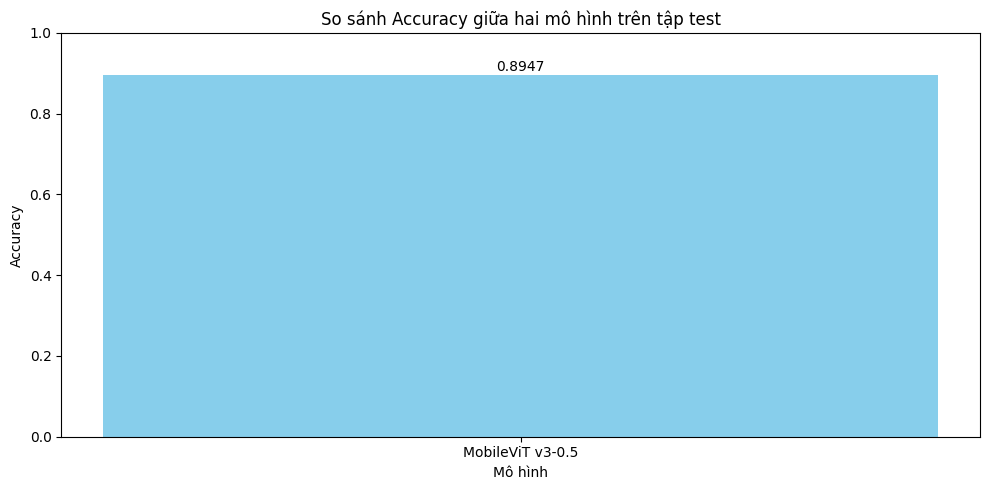

In [14]:
# ƒê√°nh gi√° m√¥ h√¨nh MobileViT v3-0.5 (small) tr√™n t·∫≠p test
test_results_small = trainer_small.evaluate(processed_datasets_small["test"])
print("K·∫øt qu·∫£ MobileViT v3-0.5 tr√™n t·∫≠p test:")
print(test_results_small)


# So s√°nh accuracy gi·ªØa hai m√¥ h√¨nh
small_accuracy = test_results_small.get("eval_accuracy", 0)

print("\n--- So s√°nh hi·ªáu su·∫•t ---")
print(f"Accuracy c·ªßa MobileViT v3-0.5: {small_accuracy:.4f}")

# V·∫Ω bi·ªÉu ƒë·ªì so s√°nh
plt.figure(figsize=(10, 5))
bar_width = 0.35
models = ['MobileViT v3-0.5']
accuracies = [small_accuracy]
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'], width=bar_width)
plt.xlabel('M√¥ h√¨nh')
plt.ylabel('Accuracy')
plt.title('So s√°nh Accuracy gi·ªØa hai m√¥ h√¨nh tr√™n t·∫≠p test')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')
plt.tight_layout()
plt.show()

In [ ]:
# H√†m ƒë·ªÉ d·ª± ƒëo√°n v√† l·∫•y c√°c nh√£n d·ª± ƒëo√°n
def get_predictions(trainer, dataset):
    predictions = trainer.predict(dataset)
    pred_labels = np.argmax(predictions.predictions, axis=1)
    true_labels = predictions.label_ids
    return pred_labels, true_labels

# L·∫•y nh√£n d·ª± ƒëo√°n v√† nh√£n th·∫≠t tr√™n t·∫≠p test cho m√¥ h√¨nh small
pred_labels_small, true_labels_small = get_predictions(trainer_small, processed_datasets_small["test"])



# T·∫°o confusion matrix cho m√¥ h√¨nh small
cm_small = confusion_matrix(true_labels_small, pred_labels_small)
labels = list(id2label.values())


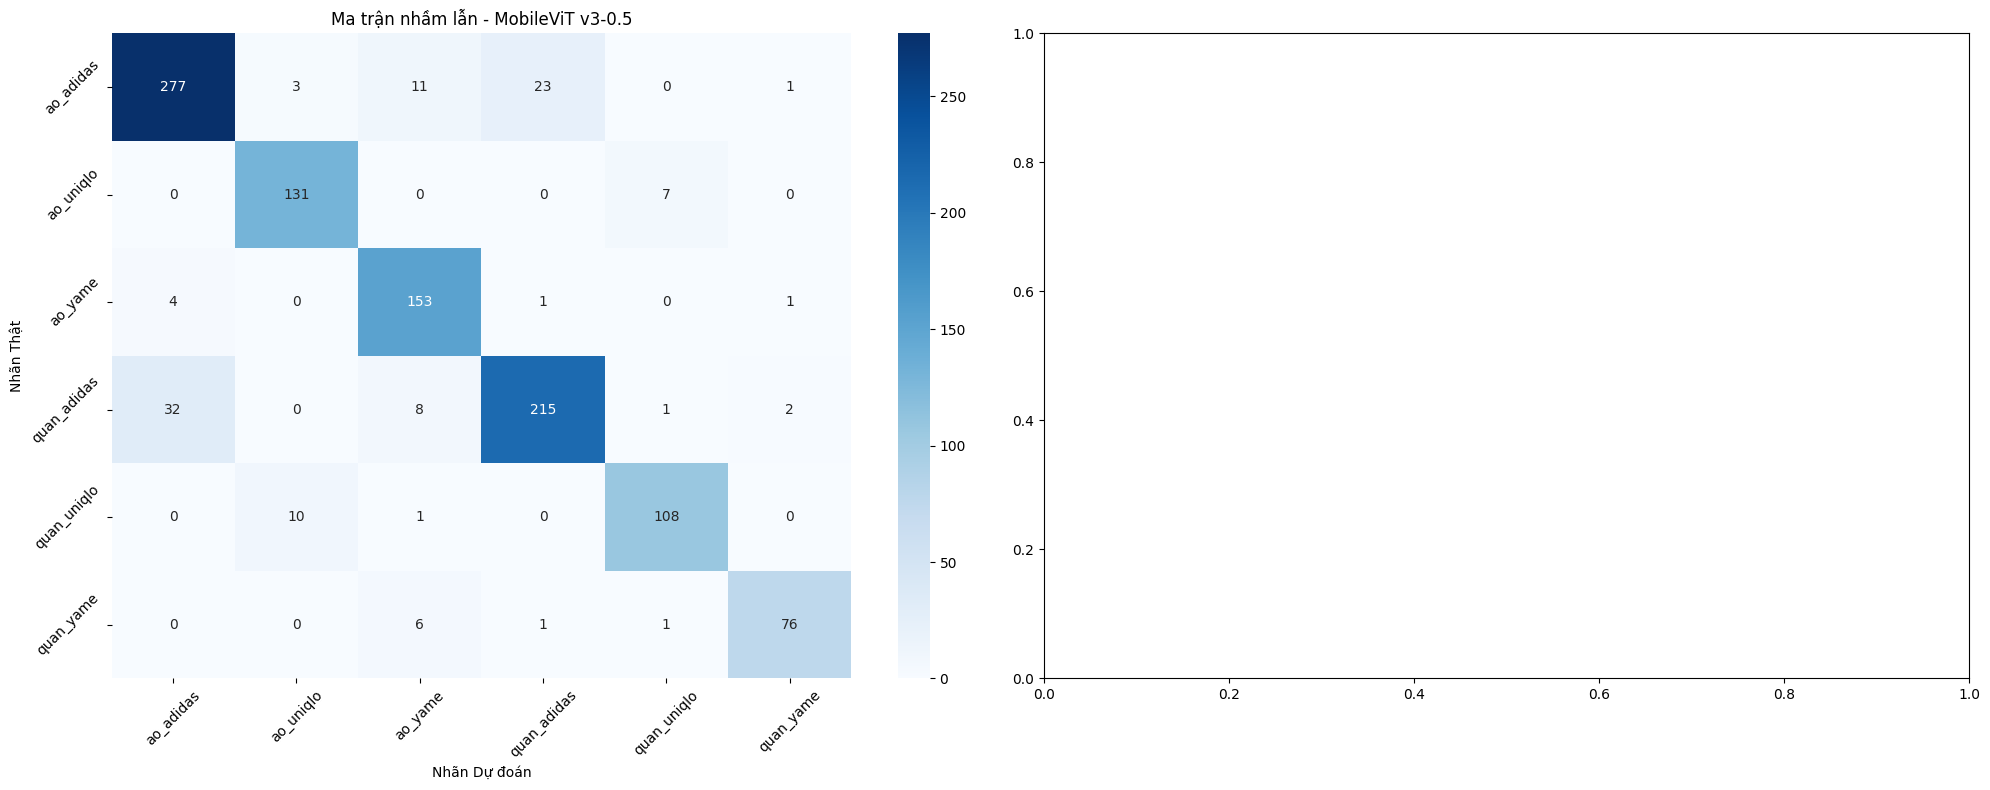

Classification Report - MobileViT v3-0.5:
              precision    recall  f1-score   support

   ao_adidas       0.88      0.88      0.88       315
   ao_uniqlo       0.91      0.95      0.93       138
     ao_yame       0.85      0.96      0.91       159
 quan_adidas       0.90      0.83      0.86       258
 quan_uniqlo       0.92      0.91      0.92       119
   quan_yame       0.95      0.90      0.93        84

    accuracy                           0.89      1073
   macro avg       0.90      0.91      0.90      1073
weighted avg       0.90      0.89      0.89      1073



In [17]:

# V·∫Ω confusion matrix cho c·∫£ hai m√¥ h√¨nh
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# V·∫Ω confusion matrix cho m√¥ h√¨nh small
sns.heatmap(cm_small, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Nh√£n D·ª± ƒëo√°n')
axes[0].set_ylabel('Nh√£n Th·∫≠t')
axes[0].set_title('Ma tr·∫≠n nh·∫ßm l·∫´n - MobileViT v3-0.5')
axes[0].set_xticklabels(labels, rotation=45)
axes[0].set_yticklabels(labels, rotation=45)

plt.tight_layout()
plt.show()

# Hi·ªÉn th·ªã classification report cho c·∫£ hai m√¥ h√¨nh
print("Classification Report - MobileViT v3-0.5:")
print(classification_report(true_labels_small, pred_labels_small, target_names=labels))

T·ªïng s·ªë d·ª± ƒëo√°n sai c·ªßa m√¥ h√¨nh: 113/1073 (10.53%)


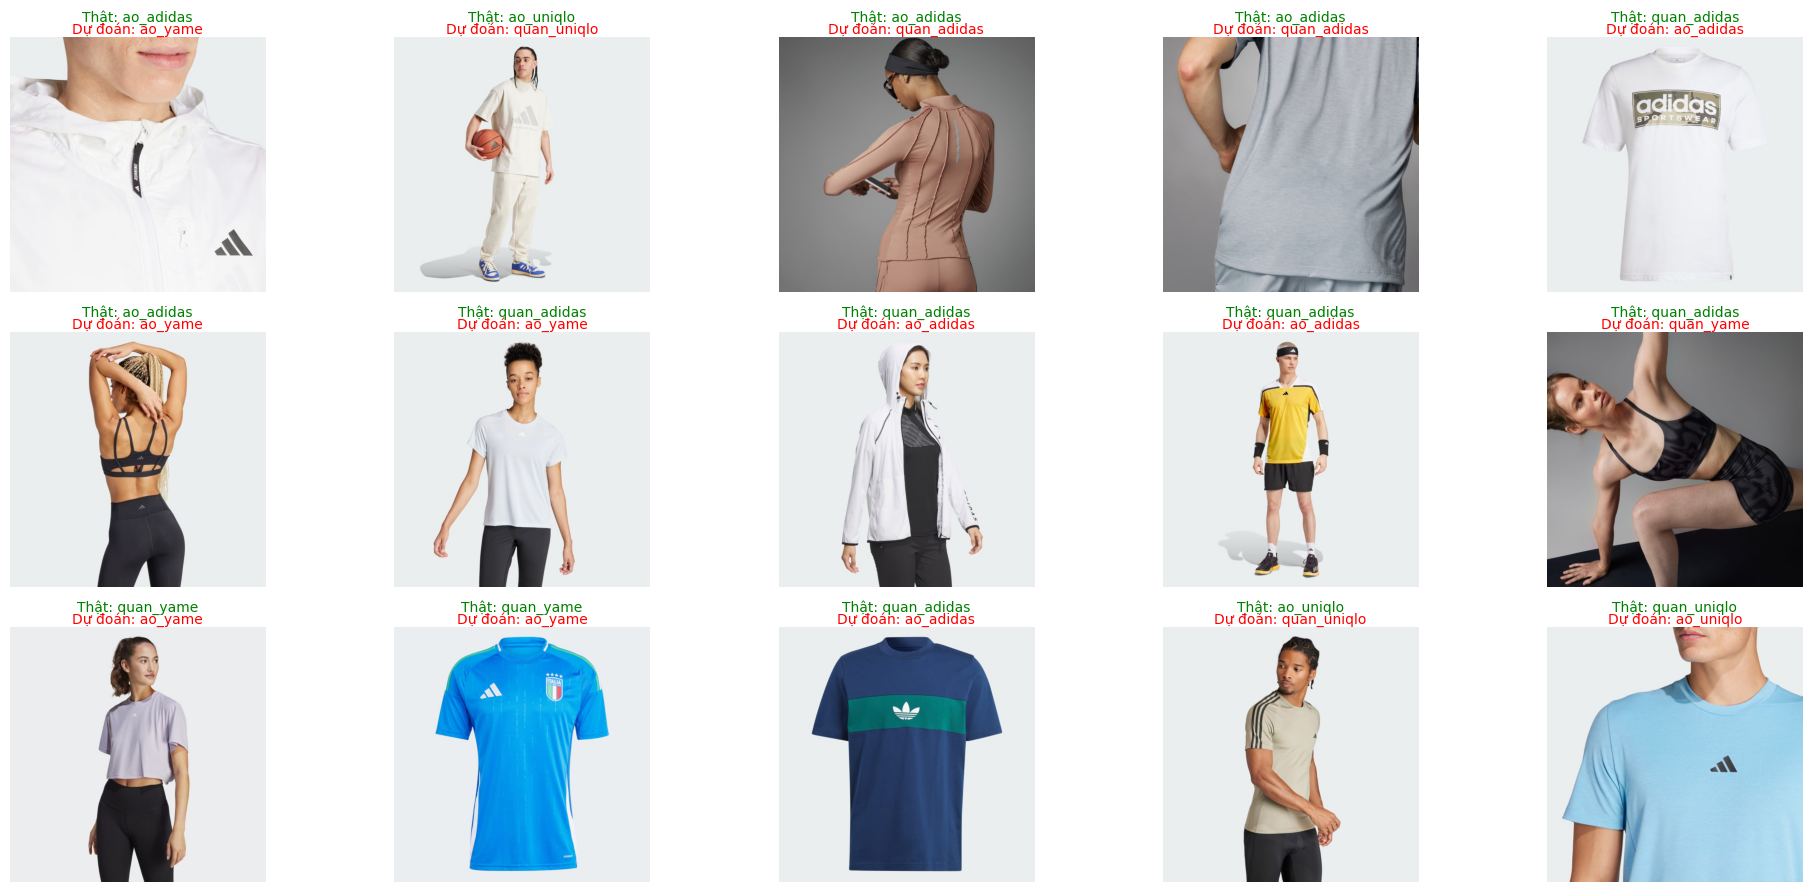

Top 5 l·ªói ph·ªï bi·∫øn nh·∫•t:
1. quan_adidas ‚Üí ao_adidas: 32 l·∫ßn
2. ao_adidas ‚Üí quan_adidas: 23 l·∫ßn
3. ao_adidas ‚Üí ao_yame: 11 l·∫ßn
4. quan_uniqlo ‚Üí ao_uniqlo: 10 l·∫ßn
5. quan_adidas ‚Üí ao_yame: 8 l·∫ßn


In [36]:
# Ph√¢n t√≠ch c√°c d·ª± ƒëo√°n sai c·ªßa m√¥ h√¨nh
incorrect_indices_small = np.where(pred_labels_small != true_labels_small)[0]

# Hi·ªÉn th·ªã c√°c d·ª± ƒëo√°n sai v·ªõi layout nhi·ªÅu h√¨nh h∆°n
def display_incorrect_predictions(dataframe, indices, pred_labels, true_labels, id2label, n_samples=50, grid_size=(5, 5)):
    rows, cols = grid_size
    n_samples = min(n_samples, len(indices))
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten()
    
    for i in range(rows * cols):
        if i < n_samples:
            idx = indices[i]
            img_path = dataframe.iloc[idx]['image_dir_fixed']
            true_label = id2label[true_labels[idx]]
            pred_label = id2label[pred_labels[idx]]
            
            try:
                img = PILImage.open(img_path)
                axes[i].imshow(img)
                # Hi·ªÉn th·ªã true label m√†u xanh v√† pred label m√†u ƒë·ªè n·∫øu sai
                # S·ª≠ d·ª•ng ax.text ƒë·ªÉ c√≥ th·ªÉ ƒë·∫∑t m√†u kh√°c nhau cho t·ª´ng ph·∫ßn
                axes[i].text(0.5, 1.05, f"Th·∫≠t: {true_label}",
                             fontsize=10,
                             color='green',
                             ha='center',
                             va='bottom',
                             transform=axes[i].transAxes)
                axes[i].text(0.5, 1.0, f"D·ª± ƒëo√°n: {pred_label}",
                             fontsize=10,
                             color='red',
                             ha='center',
                             va='bottom',
                             transform=axes[i].transAxes)
                axes[i].axis('off')
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                axes[i].text(0.5, 0.5, f"Error loading image\n{e}", ha='center', va='center')
                axes[i].axis('off')
        else:
            # Hide unused subplots
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Hi·ªÉn th·ªã c√°c d·ª± ƒëo√°n sai c·ªßa m√¥ h√¨nh MobileViT v3-0.5
print(f"T·ªïng s·ªë d·ª± ƒëo√°n sai c·ªßa m√¥ h√¨nh: {len(incorrect_indices_small)}/{len(pred_labels_small)} ({len(incorrect_indices_small)/len(pred_labels_small)*100:.2f}%)")

# Hi·ªÉn th·ªã 25 d·ª± ƒëo√°n sai trong layout 5x5
display_incorrect_predictions(
    df, incorrect_indices_small, pred_labels_small, true_labels_small, id2label, n_samples=15, grid_size=(3, 5)
)

# Ph√¢n t√≠ch c√°c lo·∫°i l·ªói ph·ªï bi·∫øn nh·∫•t
error_pairs = [(id2label[true_labels_small[i]], id2label[pred_labels_small[i]]) for i in incorrect_indices_small]
error_counts = {}
for true_label, pred_label in error_pairs:
    key = f"{true_label} ‚Üí {pred_label}"
    error_counts[key] = error_counts.get(key, 0) + 1

# Hi·ªÉn th·ªã top 5 lo·∫°i l·ªói ph·ªï bi·∫øn nh·∫•t
print("Top 5 l·ªói ph·ªï bi·∫øn nh·∫•t:")
for i, (error_type, count) in enumerate(sorted(error_counts.items(), key=lambda x: x[1], reverse=True)[:5]):
    print(f"{i+1}. {error_type}: {count} l·∫ßn")

## 9. T√†i li·ªáu tham kh·∫£o
1. Apple Inc. (2023). "MobileViT: A Mobile-Friendly Vision Transformer for Mobile Vision Tasks". In International Conference on Learning Representations (ICLR).

2. Mehta, S., & Rastegari, M. (2022). "MobileViT: Light-weight, General-purpose, and Mobile-friendly Vision Transformer". In International Conference on Learning Representations (ICLR).

3. Hugging Face Transformers documentation: https://huggingface.co/docs/transformers/model_doc/mobilevit

4. Howard, A., Sandler, M., Chu, G., Chen, L. C., Chen, B., Tan, M., ... & Adam, H. (2019). "Searching for MobileNetV3". In Proceedings of the IEEE/CVF International Conference on Computer Vision (ICCV).

5. Dosovitskiy, A., Beyer, L., Kolesnikov, A., Weissenborn, D., Zhai, X., Unterthiner, T., ... & Houlsby, N. (2020). "An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale." In International Conference on Learning Representations (ICLR).

6. T√°c gi·∫£ √°o qu·∫ßn th·ªùi trang. (2023). Nghi√™n c·ª©u ph√¢n lo·∫°i s·∫£n ph·∫©m th·ªùi trang s·ª≠ d·ª•ng h·ªçc s√¢u. T·∫°p ch√≠ Khoa h·ªçc C√¥ng ngh·ªá.